<a href="https://colab.research.google.com/github/TaeMD/ML-projects/blob/main/ANN(Loan_predictions_Udemy%20exersise).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv ('lending_club_loan_two.csv')

In [ ]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [ ]:
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


In [ ]:
df.describe(include='object')

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,purpose,title,earliest_cr_line,initial_list_status,application_type,address
count,396030,396030,396030,373103,377729,396030,396030,396030,396030,396030,394275,396030,396030,396030,396030
unique,2,7,35,173105,11,6,3,115,2,14,48817,684,2,3,393700
top,36 months,B,B3,Teacher,10+ years,MORTGAGE,Verified,Oct-2014,Fully Paid,debt_consolidation,Debt consolidation,Oct-2000,f,INDIVIDUAL,USCGC Smith\r\nFPO AE 70466
freq,302005,116018,26655,4389,126041,198348,139563,14846,318357,234507,152472,3017,238066,395319,8


In [ ]:
df.isna().mean().sort_values(ascending=False)

mort_acc                0.095435
emp_title               0.057892
emp_length              0.046211
title                   0.004431
pub_rec_bankruptcies    0.001351
revol_util              0.000697
loan_amnt               0.000000
dti                     0.000000
application_type        0.000000
initial_list_status     0.000000
total_acc               0.000000
revol_bal               0.000000
pub_rec                 0.000000
open_acc                0.000000
earliest_cr_line        0.000000
purpose                 0.000000
term                    0.000000
loan_status             0.000000
issue_d                 0.000000
verification_status     0.000000
annual_inc              0.000000
home_ownership          0.000000
sub_grade               0.000000
grade                   0.000000
installment             0.000000
int_rate                0.000000
address                 0.000000
dtype: float64

EDA

In [ ]:
### Target value

<AxesSubplot:xlabel='loan_status', ylabel='count'>

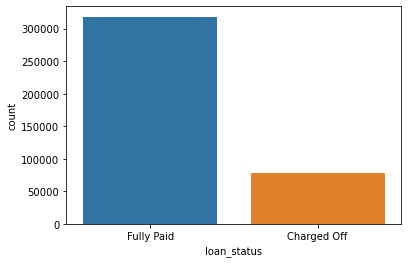

In [ ]:
sns.countplot(data=df, x='loan_status')

In [ ]:
### we can see that the target label is not well balanced. 

In [ ]:
df.loan_status.value_counts()

Fully Paid     318357
Charged Off     77673
Name: loan_status, dtype: int64

In [ ]:
318357/77673

4.098682940017767

In [ ]:
df.select_dtypes('float').columns

Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies'],
      dtype='object')

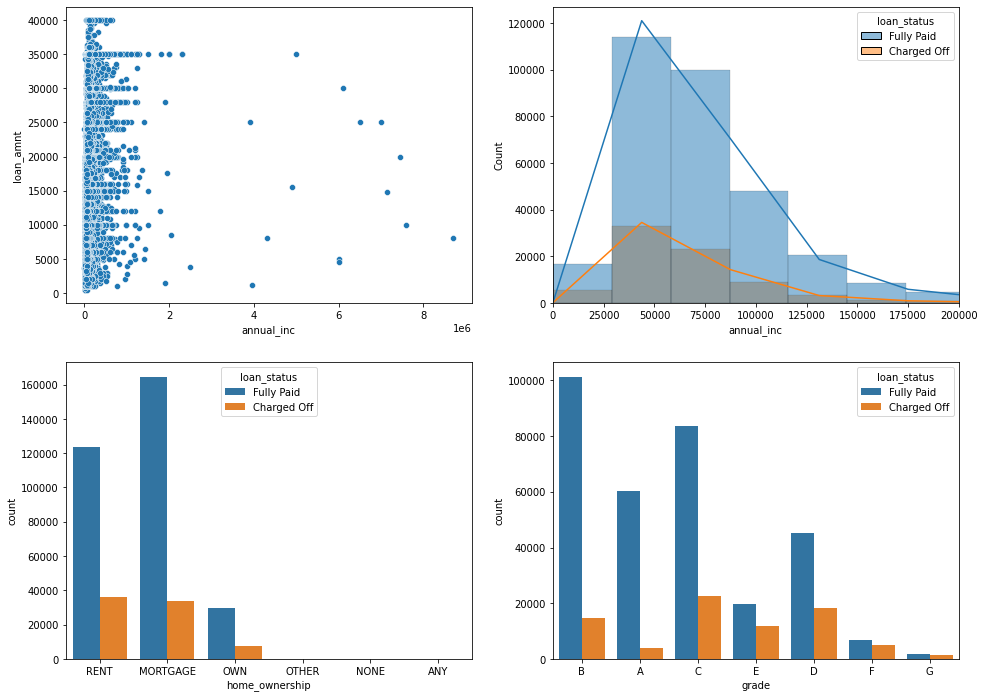

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16,12))

sns.scatterplot(data=df, x='annual_inc', y='loan_amnt', ax=axes[0,0])
sns.histplot(data=df, x ='annual_inc', bins=300, ax=axes[0,1], kde=True, hue='loan_status')
axes[0,1].set_xlim (0,200000)
sns.countplot(data=df, x='home_ownership', hue='loan_status', ax=axes[1,0])
sns.countplot(data=df, x='grade',   hue='loan_status', ax=axes[1,1])

In [ ]:
df.select_dtypes('float').columns

Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies'],
      dtype='object')

In [ ]:
for n in ['A','B','C','D','E','F','G']:
  percent = len(df[(df['grade']==n)&(df['loan_status']=='Charged Off')])/len(df[df['grade']==n]) *100
  print(n, percent)

A 6.28787760761525
B 12.573049009636437
C 21.180899544283733
D 28.86782948177067
E 37.36344004065041
F 42.78797145769623
G 47.83889980353634


In [ ]:
loan = {'Fully Paid':1, 'Charged Off':0}
df['loan_status_new']=df['loan_status'].map(loan)

In [ ]:
df.corr()['loan_status_new']

loan_amnt              -0.059836
int_rate               -0.247758
installment            -0.041082
annual_inc              0.053432
dti                    -0.062413
open_acc               -0.028012
pub_rec                -0.019933
revol_bal               0.010892
revol_util             -0.082373
total_acc               0.017893
mort_acc                0.073111
pub_rec_bankruptcies   -0.009383
loan_status_new         1.000000
Name: loan_status_new, dtype: float64

In [ ]:
df.corr()['loan_amnt']

loan_amnt               1.000000
int_rate                0.168921
installment             0.953929
annual_inc              0.336887
dti                     0.016636
open_acc                0.198556
pub_rec                -0.077779
revol_bal               0.328320
revol_util              0.099911
total_acc               0.223886
mort_acc                0.222315
pub_rec_bankruptcies   -0.106539
loan_status_new        -0.059836
Name: loan_amnt, dtype: float64

In [ ]:
for n in ['RENT', 'MORTGAGE','OWN']:
  percent = len(df[(df['home_ownership']==n)&(df['loan_status']=='Charged Off')])/len(df[df['home_ownership']==n]) *100
  print(n, percent)

RENT 22.662244195506602
MORTGAGE 16.956057031076693
OWN 20.680336989349865


In [ ]:
df.select_dtypes('object').columns

Index(['term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'title', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, '0.0'),
  Text(1, 0, '1.0'),
  Text(2, 0, '2.0'),
  Text(3, 0, '3.0'),
  Text(4, 0, '4.0'),
  Text(5, 0, '5.0'),
  Text(6, 0, '6.0'),
  Text(7, 0, '7.0'),
  Text(8, 0, '8.0'),
  Text(9, 0, '9.0'),
  Text(10, 0, '10.0'),
  Text(11, 0, '11.0'),
  Text(12, 0, '12.0'),
  Text(13, 0, '13.0'),
  Text(14, 0, '14.0'),
  Text(15, 0, '15.0'),
  Text(16, 0, '16.0'),
  Text(17, 0, '17.0'),
  Text(18, 0, '18.0'),
  Text(19, 0, '19.0'),
  Text(20, 0, '20.0'),
  Text(21, 0, '21.0'),
  Text(22, 0, '22.0'),
  Text(23, 0, '23.0'),
  Text(24, 0, '24.0'),
  Text(25, 0, '25.0'),
  Text(26, 0, '26.0'),
  Text(27, 0, '27.0'),
  Text(28, 0, '28.0'),
  Text(29, 0, '30.0'),
  Text(30, 0, '31.0'),
  Text(31, 0, '32.0'),
  Text(32, 0, '34.0')])

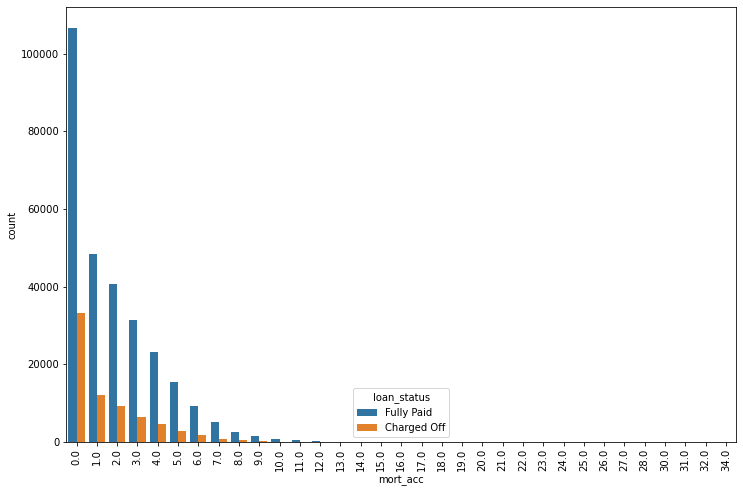

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(data=df, x='mort_acc', hue='loan_status')
plt.xticks(rotation=90)

In [ ]:
for n in range(0,11):
  percent = len(df[(df['mort_acc']==n)&(df['loan_status']=='Charged Off')])/len(df[df['mort_acc']==n]) *100
  print(n, percent)

0 23.721356160169414
1 20.064221398305087
2 18.613357892207897
3 17.1752214250046
4 16.548929608778284
5 15.708475321534571
6 15.547926641973078
7 14.821546596166558
8 14.19416853572573
9 12.620772946859905
10 12.947976878612716


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '0.0'),
  Text(1, 0, '1.0'),
  Text(2, 0, '2.0'),
  Text(3, 0, '3.0'),
  Text(4, 0, '4.0'),
  Text(5, 0, '5.0'),
  Text(6, 0, '6.0'),
  Text(7, 0, '7.0'),
  Text(8, 0, '8.0')])

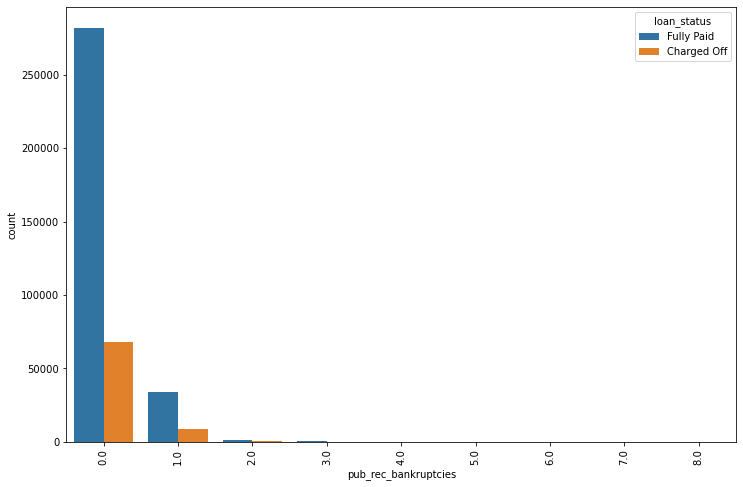

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(data=df, x='pub_rec_bankruptcies', hue='loan_status')
plt.xticks(rotation=90)

In [ ]:
for n in range(0,4):
  percent = len(df[(df['pub_rec_bankruptcies']==n)&(df['loan_status']=='Charged Off')])/len(df[df['pub_rec_bankruptcies']==n]) *100
  print(percent)

19.499115246304015
20.39495209161019
23.226854358419057
21.082621082621085


(0.0, 150.0)

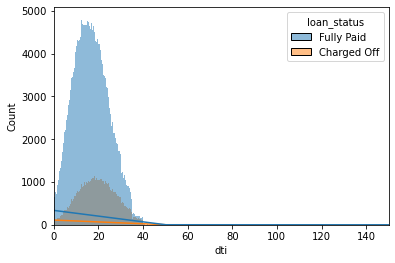

In [ ]:
sns.histplot(data=df, x ='dti',   kde=True, hue='loan_status')
plt.xlim(0,150)

In [ ]:
df.groupby('loan_status')['dti'].mean()

loan_status
Charged Off    19.656346
Fully Paid     16.824010
Name: dti, dtype: float64

<AxesSubplot:xlabel='revol_util', ylabel='Count'>

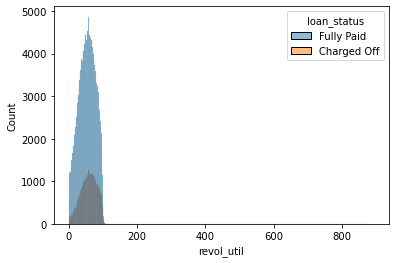

In [ ]:
sns.histplot(data=df, x='revol_util', hue='loan_status')

In [ ]:
df.groupby('loan_status')['revol_util'].mean()

loan_status
Charged Off    57.869824
Fully Paid     52.796918
Name: revol_util, dtype: float64

In [ ]:
df.select_dtypes('object').columns

Index(['term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'title', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

In [ ]:
df['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

<AxesSubplot:xlabel='term', ylabel='count'>

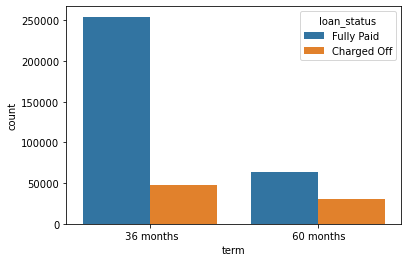

In [ ]:
sns.countplot(data=df, x='term', hue='loan_status')

In [ ]:
for n in [' 36 months', ' 60 months']:
  percent = len(df[(df['term']==n)&(df['loan_status']=='Charged Off')])/len(df[df['term']==n]) *100
  print(n, percent)

 36 months 15.774573268654493
 60 months 31.941504918904545


In [ ]:
df['sub_grade'].unique()

array(['B4', 'B5', 'B3', 'A2', 'C5', 'C3', 'A1', 'B2', 'C1', 'A5', 'E4',
       'A4', 'A3', 'D1', 'C2', 'B1', 'D3', 'D5', 'D2', 'E1', 'E2', 'E5',
       'F4', 'E3', 'D4', 'G1', 'F5', 'G2', 'C4', 'F1', 'F3', 'G5', 'G4',
       'F2', 'G3'], dtype=object)

In [ ]:
df.groupby('sub_grade')['loan_status_new'].mean()

sub_grade
A1    0.971323
A2    0.951814
A3    0.941944
A4    0.929761
A5    0.915092
B1    0.901418
B2    0.891487
B3    0.876646
B4    0.861607
B5    0.844963
C1    0.826304
C2    0.802480
C3    0.781584
C4    0.764645
C5    0.754933
D1    0.736197
D2    0.719662
D3    0.715782
D4    0.688685
D5    0.679897
E1    0.655930
E2    0.632620
E3    0.619623
E4    0.606976
E5    0.596894
F1    0.612557
F2    0.575199
F3    0.563867
F4    0.543928
F5    0.513243
G1    0.538752
G2    0.517241
G3    0.489130
G4    0.550802
G5    0.496835
Name: loan_status_new, dtype: float64

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

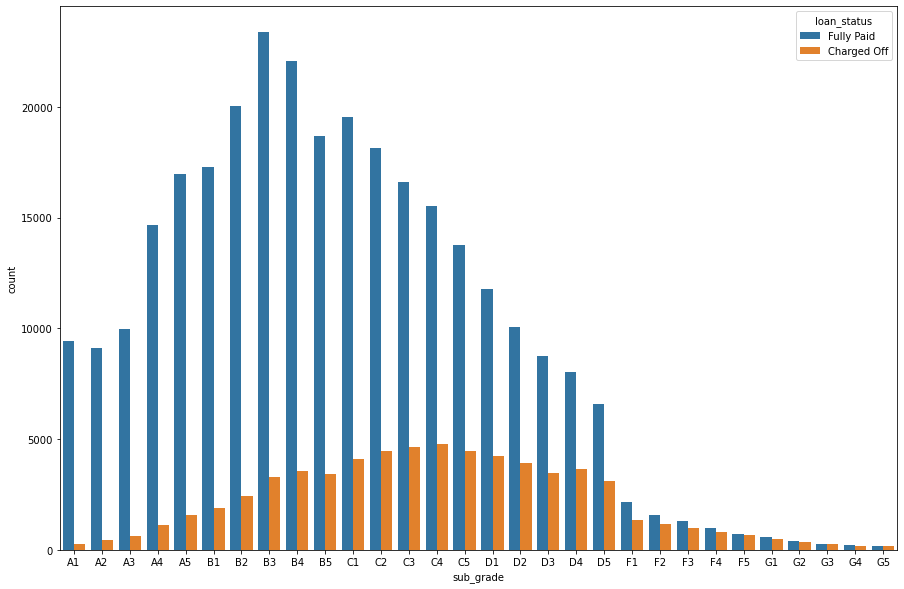

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(data=df, x='sub_grade',order=['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 
                                            'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 
                                            'G4', 'G5'], hue='loan_status')

In [ ]:
df['emp_length'].value_counts()

10+ years    126041
2 years       35827
< 1 year      31725
3 years       31665
5 years       26495
1 year        25882
4 years       23952
6 years       20841
7 years       20819
8 years       19168
9 years       15314
Name: emp_length, dtype: int64

<AxesSubplot:xlabel='emp_length', ylabel='count'>

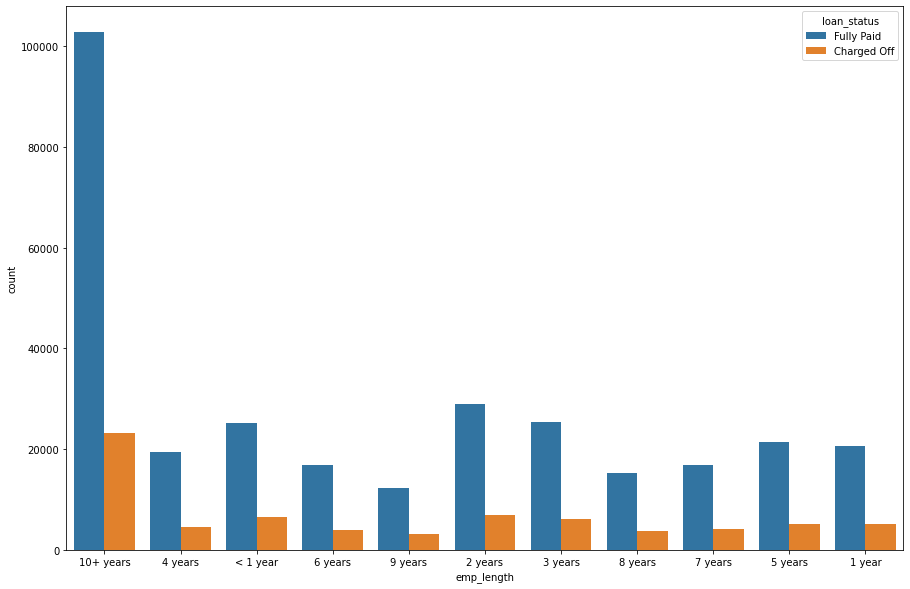

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(data=df, x='emp_length', hue='loan_status')

In [ ]:
 df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_status_new
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650",0


In [ ]:
def zipcode(zip):
  return zip[-5:]

In [ ]:
df['zipcode'] = df['address'].map(zipcode)

In [ ]:
df['zipcode'].value_counts()

70466    56985
30723    56546
22690    56527
48052    55917
00813    45824
29597    45471
05113    45402
11650    11226
93700    11151
86630    10981
Name: zipcode, dtype: int64

In [ ]:
df.corr()['loan_status_new']

loan_amnt              -0.059836
int_rate               -0.247758
installment            -0.041082
annual_inc              0.053432
dti                    -0.062413
open_acc               -0.028012
pub_rec                -0.019933
revol_bal               0.010892
revol_util             -0.082373
total_acc               0.017893
mort_acc                0.073111
pub_rec_bankruptcies   -0.009383
loan_status_new         1.000000
Name: loan_status_new, dtype: float64

<AxesSubplot:xlabel='zipcode', ylabel='count'>

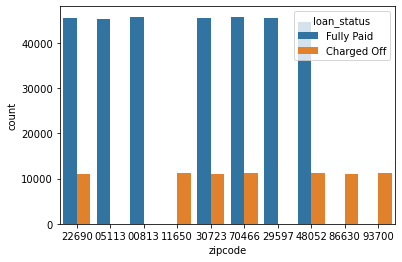

In [ ]:
sns.countplot(data=df, x='zipcode', hue='loan_status')

In [ ]:
###. Data PreProcessing

In [ ]:
df.isna().mean().sort_values(ascending=False)

mort_acc                0.095435
emp_title               0.057892
emp_length              0.046211
title                   0.004431
pub_rec_bankruptcies    0.001351
revol_util              0.000697
earliest_cr_line        0.000000
loan_status_new         0.000000
address                 0.000000
application_type        0.000000
initial_list_status     0.000000
total_acc               0.000000
revol_bal               0.000000
pub_rec                 0.000000
open_acc                0.000000
loan_amnt               0.000000
dti                     0.000000
term                    0.000000
purpose                 0.000000
loan_status             0.000000
issue_d                 0.000000
verification_status     0.000000
annual_inc              0.000000
home_ownership          0.000000
sub_grade               0.000000
grade                   0.000000
installment             0.000000
int_rate                0.000000
zipcode                 0.000000
dtype: float64

In [ ]:
df.corr()['mort_acc'].sort_values(ascending=False)

mort_acc                1.000000
total_acc               0.381072
annual_inc              0.236320
loan_amnt               0.222315
revol_bal               0.194925
installment             0.193694
open_acc                0.109205
loan_status_new         0.073111
pub_rec_bankruptcies    0.027239
pub_rec                 0.011552
revol_util              0.007514
dti                    -0.025439
int_rate               -0.082583
Name: mort_acc, dtype: float64

In [ ]:
df.groupby('total_acc')['mort_acc'].mean()[:20]

total_acc
2.0     0.000000
3.0     0.052023
4.0     0.066743
5.0     0.103289
6.0     0.151293
7.0     0.221695
8.0     0.308422
9.0     0.365499
10.0    0.429158
11.0    0.526570
12.0    0.618034
13.0    0.722124
14.0    0.803482
15.0    0.940142
16.0    1.007405
17.0    1.151269
18.0    1.235885
19.0    1.358013
20.0    1.409380
Name: mort_acc, dtype: float64

<AxesSubplot:xlabel='total_acc', ylabel='mort_acc'>

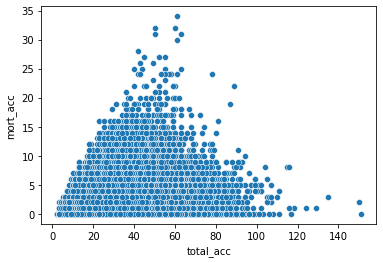

In [ ]:
sns.scatterplot(data=df, x='total_acc', y='mort_acc')

In [ ]:
df['mort_acc']= df.groupby('total_acc')['mort_acc'].transform(lambda x:x.fillna(x.mean()))

In [ ]:
df['mort_acc'].median()

1.0

In [ ]:
##df['mort_acc'] = df['mort_acc'].fillna(0)

In [ ]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                    0
pub_rec_bankruptcies      535
address                     0
loan_status_new             0
zipcode                     0
dtype: int64

In [ ]:
df['emp_title'].value_counts()[:20]

Teacher                     4389
Manager                     4250
Registered Nurse            1856
RN                          1846
Supervisor                  1830
Sales                       1638
Project Manager             1505
Owner                       1410
Driver                      1339
Office Manager              1218
manager                     1145
Director                    1089
General Manager             1074
Engineer                     995
teacher                      962
driver                       882
Vice President               857
Operations Manager           763
Administrative Assistant     756
Accountant                   748
Name: emp_title, dtype: int64

In [ ]:
df.describe(include='object')

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,purpose,title,earliest_cr_line,initial_list_status,application_type,address,zipcode
count,396030,396030,396030,373103,377729,396030,396030,396030,396030,396030,394275,396030,396030,396030,396030,396030
unique,2,7,35,173105,11,6,3,115,2,14,48817,684,2,3,393700,10
top,36 months,B,B3,Teacher,10+ years,MORTGAGE,Verified,Oct-2014,Fully Paid,debt_consolidation,Debt consolidation,Oct-2000,f,INDIVIDUAL,USCGC Smith\r\nFPO AE 70466,70466
freq,302005,116018,26655,4389,126041,198348,139563,14846,318357,234507,152472,3017,238066,395319,8,56985


In [ ]:
df.drop('emp_title', axis=1, inplace=True)

In [ ]:
df.isnull().sum().sort_values(ascending=False)

emp_length              18301
title                    1755
pub_rec_bankruptcies      535
revol_util                276
loan_amnt                   0
earliest_cr_line            0
loan_status_new             0
address                     0
mort_acc                    0
application_type            0
initial_list_status         0
total_acc                   0
revol_bal                   0
pub_rec                     0
open_acc                    0
dti                         0
term                        0
purpose                     0
loan_status                 0
issue_d                     0
verification_status         0
annual_inc                  0
home_ownership              0
sub_grade                   0
grade                       0
installment                 0
int_rate                    0
zipcode                     0
dtype: int64

In [ ]:
df.emp_length.value_counts()

10+ years    126041
2 years       35827
< 1 year      31725
3 years       31665
5 years       26495
1 year        25882
4 years       23952
6 years       20841
7 years       20819
8 years       19168
9 years       15314
Name: emp_length, dtype: int64

In [ ]:
df['emp_length'] = df['emp_length'].fillna('missing')

In [ ]:
df.isnull().sum().sort_values(ascending=False)

title                   1755
pub_rec_bankruptcies     535
revol_util               276
loan_amnt                  0
earliest_cr_line           0
loan_status_new            0
address                    0
mort_acc                   0
application_type           0
initial_list_status        0
total_acc                  0
revol_bal                  0
pub_rec                    0
open_acc                   0
dti                        0
term                       0
purpose                    0
loan_status                0
issue_d                    0
verification_status        0
annual_inc                 0
home_ownership             0
emp_length                 0
sub_grade                  0
grade                      0
installment                0
int_rate                   0
zipcode                    0
dtype: int64

In [ ]:
df.title.value_counts()[:10]

Debt consolidation         152472
Credit card refinancing     51487
Home improvement            15264
Other                       12930
Debt Consolidation          11608
Major purchase               4769
Consolidation                3852
debt consolidation           3547
Business                     2949
Debt Consolidation Loan      2864
Name: title, dtype: int64

In [ ]:
len(df)

396030

In [ ]:
cons=df[df['title'].str.contains('consolidation')==True]

In [ ]:
162814/396030

0.411115319546499

In [ ]:
cons['loan_status'].value_counts()

Fully Paid     125875
Charged Off     36939
Name: loan_status, dtype: int64

In [ ]:
df.drop('title', axis=1, inplace=True)

In [ ]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
emp_length                0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_status_new           0
zipcode                   0
dtype: int64

In [ ]:
df['pub_rec_bankruptcies'].mode()

0    0.0
dtype: float64

In [ ]:
df['pub_rec_bankruptcies'].value_counts()

0.0    350380
1.0     42790
2.0      1847
3.0       351
4.0        82
5.0        32
6.0         7
7.0         4
8.0         2
Name: pub_rec_bankruptcies, dtype: int64

In [ ]:
df['pub_rec_bankruptcies']=df['pub_rec_bankruptcies'].fillna(0)

In [ ]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
emp_length                0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies      0
address                   0
loan_status_new           0
zipcode                   0
dtype: int64

In [ ]:
df['revol_util'].describe()

count    395754.000000
mean         53.791749
std          24.452193
min           0.000000
25%          35.800000
50%          54.800000
75%          72.900000
max         892.300000
Name: revol_util, dtype: float64

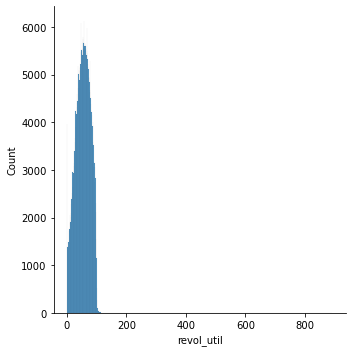

In [ ]:
sns.displot(data=df, x='revol_util')

In [ ]:
df['revol_util'].median()

54.8

In [ ]:
df['revol_util'].value_counts()

0.00      2213
53.00      752
60.00      739
61.00      734
55.00      730
          ... 
892.30       1
110.10       1
123.00       1
49.63        1
128.10       1
Name: revol_util, Length: 1226, dtype: int64

In [ ]:
df['revol_util'].fillna(54.8, inplace=True)

In [ ]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_status_new         0
zipcode                 0
dtype: int64

In [ ]:
df.drop('address', axis=1, inplace=True)

In [ ]:
df.drop('issue_d', axis=1, inplace=True)

In [ ]:
df.drop('grade', axis=1, inplace=True)

In [ ]:
df.shape

(396030, 24)

In [ ]:
df['purpose'].value_counts()

debt_consolidation    234507
credit_card            83019
home_improvement       24030
other                  21185
major_purchase          8790
small_business          5701
car                     4697
medical                 4196
moving                  2854
vacation                2452
house                   2201
wedding                 1812
renewable_energy         329
educational              257
Name: purpose, dtype: int64

In [ ]:
(234507 + 83019 + 24030)/394030

0.8668273989290155

In [ ]:
pur = {'small_business':'other', 'car':'other', "medical":'other', 'moving':'other','vacation':'other',
       'house':'other','wedding':'other','renewable_energy':'other','educational':'other'}

In [ ]:
df['purpose'].replace(pur)

0                      other
1         debt_consolidation
2                credit_card
3                credit_card
4                credit_card
                 ...        
396025    debt_consolidation
396026    debt_consolidation
396027    debt_consolidation
396028    debt_consolidation
396029    debt_consolidation
Name: purpose, Length: 396030, dtype: object

In [ ]:
df['purpose']= df['purpose'].replace(pur)

In [ ]:
df['purpose'].value_counts()

debt_consolidation    234507
credit_card            83019
other                  45684
home_improvement       24030
major_purchase          8790
Name: purpose, dtype: int64

In [ ]:
df.drop('loan_status', axis=1, inplace=True)

In [ ]:
df.shape

(396030, 23)

In [ ]:
df['home_ownership'].value_counts()

MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          112
NONE            31
ANY              3
Name: home_ownership, dtype: int64

In [ ]:
home = {'NONE':'OTHER', 'ANY':'OTHER'}

In [ ]:
df['home_ownership']=df['home_ownership'].replace(home)

In [ ]:
df.drop('emp_length', axis=1, inplace=True)

In [ ]:
df.shape

(396030, 22)

In [ ]:
df['year']= df['earliest_cr_line'].apply(lambda x:x[-4:])
df['year'].astype('int')

0         1990
1         2004
2         2007
3         2006
4         1999
          ... 
396025    2004
396026    2006
396027    1997
396028    1990
396029    1998
Name: year, Length: 396030, dtype: int64

In [ ]:
df.drop('earliest_cr_line', axis=1, inplace=True)

In [ ]:
df['year'] = df['year'].astype('int')

In [ ]:
df.shape

(396030, 22)

In [ ]:
df['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [ ]:
df['term']=df['term'].map({' 36 months':36, ' 60 months':60})

In [ ]:
### Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df_dummies = pd.get_dummies(df, drop_first=True)

In [ ]:
df.shape

(396030, 22)

In [ ]:
df_dummies.shape

(396030, 70)

In [ ]:
df_dummies

,loan_amnt,term,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,...,application_type_JOINT,zipcode_05113,zipcode_11650,zipcode_22690,zipcode_29597,zipcode_30723,zipcode_48052,zipcode_70466,zipcode_86630,zipcode_93700
0,10000.0,36,11.44,329.48,117000.0,26.24,16.0,0.0,36369.0,41.8,...,0,0,0,1,0,0,0,0,0,0
1,8000.0,36,11.99,265.68,65000.0,22.05,17.0,0.0,20131.0,53.3,...,0,1,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,506.97,43057.0,12.79,13.0,0.0,11987.0,92.2,...,0,1,0,0,0,0,0,0,0,0
3,7200.0,36,6.49,220.65,54000.0,2.60,6.0,0.0,5472.0,21.5,...,0,0,0,0,0,0,0,0,0,0
4,24375.0,60,17.27,609.33,55000.0,33.95,13.0,0.0,24584.0,69.8,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60,10.99,217.38,40000.0,15.63,6.0,0.0,1990.0,34.3,...,0,0,0,0,0,1,0,0,0,0
396026,21000.0,36,12.29,700.42,110000.0,21.45,6.0,0.0,43263.0,95.7,...,0,1,0,0,0,0,0,0,0,0
396027,5000.0,36,9.99,161.32,56500.0,17.56,15.0,0.0,32704.0,66.9,...,0,0,0,0,0,0,0,1,0,0
396028,21000.0,60,15.31,503.02,64000.0,15.88,9.0,0.0,15704.0,53.8,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
X = df_dummies.drop('loan_status_new', axis=1).values
y= df_dummies['loan_status_new'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [ ]:
scaler = MinMaxScaler()

In [ ]:
X_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_scaled.shape

(277221, 69)

In [ ]:
import tensorflow as tf

Init Plugin
Init Graph Optimizer
Init Kernel


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
model = Sequential()

model.add(Dense(69, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(40, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(20, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1, activation='sigmoid'))

Metal device set to: Apple M1 Pro


2021-11-28 23:06:22.561164: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2021-11-28 23:06:22.561493: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [ ]:
model.compile (optimizer='adam', loss='binary_crossentropy')

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=5 )

In [ ]:
model.fit(X_scaled, y_train, epochs=20, validation_data=(X_test_scaled, y_test),batch_size=128, callbacks=[early_stop])

2021-11-28 23:06:35.956457: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-11-28 23:06:35.959250: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/20


2021-11-28 23:06:36.420003: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


2166/2166 [==============================] - ETA: 0s - loss: 0.3016

2021-11-28 23:06:53.189288: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


2166/2166 [==============================] - 19s 8ms/step - loss: 0.3016 - val_loss: 0.2620
Epoch 2/20
2166/2166 [==============================] - 17s 8ms/step - loss: 0.2675 - val_loss: 0.2603
Epoch 3/20
2166/2166 [==============================] - 17s 8ms/step - loss: 0.2649 - val_loss: 0.2596
Epoch 4/20
2166/2166 [==============================] - 17s 8ms/step - loss: 0.2641 - val_loss: 0.2597
Epoch 5/20
2166/2166 [==============================] - 17s 8ms/step - loss: 0.2630 - val_loss: 0.2592
Epoch 6/20
2166/2166 [==============================] - 17s 8ms/step - loss: 0.2624 - val_loss: 0.2593
Epoch 7/20
2166/2166 [==============================] - 17s 8ms/step - loss: 0.2620 - val_loss: 0.2603
Epoch 8/20
2166/2166 [==============================] - 18s 8ms/step - loss: 0.2615 - val_loss: 0.2590
Epoch 9/20
2166/2166 [==============================] - 17s 8ms/step - loss: 0.2613 - val_loss: 0.2591
Epoch 10/20
2166/2166 [==============================] - 17s 8ms/step - loss: 0.2614

In [ ]:
model.fit(X_scaled, y_train, epochs=20, validation_data=(X_test_scaled, y_test),batch_size=128, callbacks=[early_stop])

Epoch 1/20
2166/2166 [==============================] - 13s 5ms/step - loss: 0.3042 - val_loss: 0.2610
Epoch 2/20
2166/2166 [==============================] - 11s 5ms/step - loss: 0.2676 - val_loss: 0.2610
Epoch 3/20
2166/2166 [==============================] - 10s 5ms/step - loss: 0.2648 - val_loss: 0.2599
Epoch 4/20
2166/2166 [==============================] - 11s 5ms/step - loss: 0.2636 - val_loss: 0.2596
Epoch 5/20
2166/2166 [==============================] - 10s 5ms/step - loss: 0.2630 - val_loss: 0.2595
Epoch 6/20
2166/2166 [==============================] - 10s 5ms/step - loss: 0.2627 - val_loss: 0.2598
Epoch 7/20
2166/2166 [==============================] - 10s 5ms/step - loss: 0.2620 - val_loss: 0.2591
Epoch 8/20
2166/2166 [==============================] - 11s 5ms/step - loss: 0.2618 - val_loss: 0.2591
Epoch 9/20
2166/2166 [==============================] - 11s 5ms/step - loss: 0.2614 - val_loss: 0.2591
Epoch 10/20
2166/2166 [==============================] - 10s 5ms/step - l

In [ ]:
losses = pd.DataFrame(model.history.history)

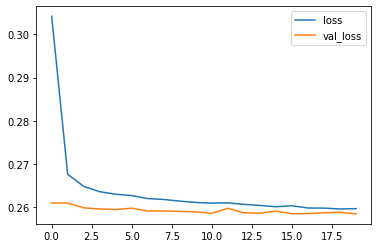

In [ ]:
losses.plot()

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
predict = np.where(model.predict(X_test_scaled) > 0.5, 1,0)

In [ ]:
confusion_matrix(y_test, predict)

array([[10082, 13178],
       [   21, 95528]])

In [ ]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       1.00      0.43      0.60     23260
           1       0.88      1.00      0.94     95549

    accuracy                           0.89    118809
   macro avg       0.94      0.72      0.77    118809
weighted avg       0.90      0.89      0.87    118809



In [ ]:
import random
random.seed(101)
random_ind = random.randint(0,len(df))

new_customer = df_dummies.drop('loan_status_new',axis=1).iloc[random_ind]
new_customer

loan_amnt        24000.00
term                60.00
int_rate            13.11
installment        547.43
annual_inc       85000.00
                   ...   
zipcode_30723        0.00
zipcode_48052        0.00
zipcode_70466        0.00
zipcode_86630        0.00
zipcode_93700        0.00
Name: 304691, Length: 69, dtype: float64

In [ ]:
new_customer.values

array([2.4000e+04, 6.0000e+01, 1.3110e+01, 5.4743e+02, 8.5000e+04,
       1.0980e+01, 6.0000e+00, 0.0000e+00, 3.5464e+04, 6.6800e+01,
       2.9000e+01, 8.0000e+00, 0.0000e+00, 1.9910e+03, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
       1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00])

In [ ]:
new_customer.values.shape

(69,)

In [ ]:
b = new_customer.values.reshape(-1,69)

In [ ]:
a = new_customer.values.reshape(-2,69)

In [ ]:
a == b

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True]])

In [ ]:
model.predict(new_customer.values.reshape(1,69))

array([[1.]], dtype=float32)

In [ ]:
df.iloc[random_ind]['loan_status_new']

1